In [1]:
# Use functions from .py file
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.functions as funcs

C:\Users\eincr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import requests
import pandas as pd
url1 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/921/csv/17.csv'
r1 = requests.get(url1)
open('mead.csv', "wb").write(r1.content)
Lake_Mead = pd.read_csv('mead.csv')

In [3]:
Lake_Mead.head()

,datetime,storage
0,1937-05-28,10046048.3
1,1937-05-29,10138665.0
2,1937-05-30,10228958.7
3,1937-05-31,10302056.6
4,1937-06-01,10373112.5


In [4]:
url2 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/919/csv/17.csv'
r2 = requests.get(url2)
open('powell.csv', "wb").write(r2.content)
Lake_Powell = pd.read_csv('powell.csv')

In [5]:
Lake_Powell.head()

,datetime,storage
0,1963-06-28,0.0
1,1963-06-29,5400.0
2,1963-06-30,7400.0
3,1963-07-01,9400.0
4,1963-07-02,13400.0


In [6]:
url3 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/923/csv/17.csv'
r3 = requests.get(url3)
open('Lake_Havasu.csv', "wb").write(r3.content)
Lake_Havasu = pd.read_csv('Lake_Havasu.csv')

In [7]:
Lake_Havasu.head()

,datetime,storage
0,1938-10-01,24900.0
1,1938-10-02,24900.0
2,1938-10-03,24700.0
3,1938-10-04,24700.0
4,1938-10-05,24300.0


In [8]:
url4 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/922/csv/17.csv'
r4 = requests.get(url4)
open('Lake_Mohave.csv', "wb").write(r4.content)
Lake_Mohave = pd.read_csv('Lake_Mohave.csv')

In [9]:
Lake_Mohave.head()

,datetime,storage
0,1950-02-02,220200.0
1,1950-02-03,224700.0
2,1950-02-04,223500.0
3,1950-02-05,218000.0
4,1950-02-06,219200.0


In [10]:
url5 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/3083/csv/17.csv'
r5 = requests.get(url5)
open('Lake_Nighthorse.csv', "wb").write(r5.content)
Lake_Nighthorse = pd.read_csv('Lake_Nighthorse.csv')

In [11]:
Lake_Nighthorse.head()

,datetime,storage
0,2009-06-09,171.0
1,2009-06-10,736.0
2,2009-06-11,1271.0
3,2009-06-12,1866.0
4,2009-06-13,2335.0


In [12]:
url6 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/100010/csv/17.csv'
r6 = requests.get(url6)
open('Granby_Reservoir.csv', "wb").write(r6.content)
Granby_Reservoir = pd.read_csv('Granby_Reservoir.csv')

In [13]:
Granby_Reservoir.head()

,datetime,storage
0,1951-09-01,296136.0
1,1951-09-02,296405.0
2,1951-09-03,296567.0
3,1951-09-04,296729.0
4,1951-09-05,296890.0


In [14]:
url7 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/915/csv/17.csv'
r7 = requests.get(url7)
open('Crystal_Reservoir.csv', "wb").write(r7.content)
Crystal_Reservoir = pd.read_csv('Crystal_Reservoir.csv')

In [15]:
Crystal_Reservoir.head()

,datetime,storage
0,1977-03-13,38.000000
1,1977-03-14,72.846298
2,1977-03-15,90.153954
3,1977-03-16,109.769287
4,1977-03-17,123.961334


In [16]:
url8 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/2686/csv/17.csv'
r8 = requests.get(url8)
open('Heron_Reservoir.csv', "wb").write(r8.content)
Heron_Reservoir = pd.read_csv('Heron_Reservoir.csv')

In [17]:
Heron_Reservoir.head()

,datetime,storage
0,1974-12-31,149900.0
1,1975-01-01,149900.0
2,1975-01-02,149900.0
3,1975-01-03,149900.0
4,1975-01-04,149900.0


In [18]:
url9 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/948/csv/17.csv'
r9 = requests.get(url9)
open('Ridgway_Reservoir.csv', "wb").write(r9.content)
Ridgway_Reservoir = pd.read_csv('Ridgway_Reservoir.csv')

In [19]:
Ridgway_Reservoir.head()

,datetime,storage
0,1986-10-20,0.0
1,1986-10-21,0.0
2,1986-10-22,0.0
3,1986-10-23,0.0
4,1986-10-24,0.0


In [20]:
url10 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/920/csv/17.csv'
r10 = requests.get(url10)
open('Navajo_Reservoir.csv', "wb").write(r10.content)
Navajo_Reservoir = pd.read_csv('Navajo_Reservoir.csv')

In [21]:
Navajo_Reservoir.head()

,datetime,storage
0,1962-07-01,4200.00000
1,1962-07-02,7000.00000
2,1962-07-03,9590.13672
3,1962-07-04,12064.17970
4,1962-07-05,14640.00000


In [22]:
url11 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/958/csv/17.csv'
r11 = requests.get(url11)
open('McPhee_Reservoir.csv', "wb").write(r11.content)
McPhee_Reservoir = pd.read_csv('McPhee_Reservoir.csv')

In [23]:
McPhee_Reservoir.head()

,datetime,storage
0,1984-03-20,1455.0
1,1984-03-21,2572.0
2,1984-03-22,5182.0
3,1984-03-23,6828.0
4,1984-03-24,8361.0


In [24]:
url12 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/946/csv/17.csv'
r12 = requests.get(url12)
open('Pineview_Reservoir.csv', "wb").write(r12.content)
Pineview_Reservoir = pd.read_csv('Pineview_Reservoir.csv')

In [25]:
Pineview_Reservoir.head()

,datetime,storage
0,1977-12-01,34299.0
1,1977-12-02,34299.0
2,1977-12-03,34299.0
3,1977-12-04,34456.0
4,1977-12-05,34456.0


In [26]:
url13 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/931/csv/17.csv'
r13 = requests.get(url13)
open('Scofield_Reservoir.csv', "wb").write(r13.content)
Scofield_Reservoir = pd.read_csv('Scofield_Reservoir.csv')

In [27]:
Scofield_Reservoir.head()

,datetime,storage
0,1974-10-31,31784.24
1,1974-11-01,NaN
2,1974-11-02,NaN
3,1974-11-03,NaN
4,1974-11-04,NaN


In [28]:
url14 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/933/csv/17.csv'
r14 = requests.get(url14)
open('Vallecito_Reservoir.csv', "wb").write(r14.content)
Vallecito_Reservoir = pd.read_csv('Vallecito_Reservoir.csv')

In [29]:
Vallecito_Reservoir.head()

,datetime,storage
0,1941-05-03,1776.14
1,1941-05-04,2138.14
2,1941-05-05,2419.46
3,1941-05-06,2753.01
4,1941-05-07,3385.58


In [30]:
url15 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/913/csv/17.csv'
r15 = requests.get(url15)
open('Blue_Mesa_Reservoir.csv', "wb").write(r15.content)
Blue_Mesa_Reservoir = pd.read_csv('Blue_Mesa_Reservoir.csv')

In [31]:
Blue_Mesa_Reservoir.head()

,datetime,storage
0,1966-01-31,6502.0
1,1966-02-01,NaN
2,1966-02-02,NaN
3,1966-02-03,NaN
4,1966-02-04,NaN


In [32]:
url16 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/925/csv/17.csv'
r16 = requests.get(url16)
open('Wilard_Bay_Reservoir.csv', "wb").write(r16.content)
Wilard_Bay_Reservoir = pd.read_csv('Wilard_Bay_Reservoir.csv')

In [33]:
Wilard_Bay_Reservoir.head()

,datetime,storage
0,1985-12-22,158032.172
1,1985-12-23,NaN
2,1985-12-24,NaN
3,1985-12-25,NaN
4,1985-12-26,NaN


In [34]:
url17 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/962/csv/17.csv'
r17 = requests.get(url17)
open('Strawberry_Reservoir.csv', "wb").write(r17.content)
Strawberry_Reservoir = pd.read_csv('Strawberry_Reservoir.csv')

In [35]:
Strawberry_Reservoir.head()

,datetime,storage
0,1975-04-30,11422.0
1,1975-05-01,11434.0
2,1975-05-02,NaN
3,1975-05-03,NaN
4,1975-05-04,NaN


In [36]:
url18 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/964/csv/17.csv'
r18 = requests.get(url18)
open('Jordanelle_Reservoir.csv', "wb").write(r18.content)
Jordanelle_Reservoir = pd.read_csv('Jordanelle_Reservoir.csv')

In [37]:
Jordanelle_Reservoir.head()

,datetime,storage
0,1993-02-05,1119.99
1,1993-02-06,1177.69
2,1993-02-07,1237.00
3,1993-02-08,1299.81
4,1993-02-09,1382.50


In [38]:
url19 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/912/csv/17.csv'
r19 = requests.get(url19)
open('Taylor_Park_Reservoir.csv', "wb").write(r19.content)
Taylor_Park_Reservoir = pd.read_csv('Taylor_Park_Reservoir.csv')

In [39]:
Taylor_Park_Reservoir.head()

,datetime,storage
0,1958-10-01,51571.852
1,1958-10-02,51507.250
2,1958-10-03,51571.852
3,1958-10-04,51571.852
4,1958-10-05,51571.852


In [40]:
url20 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/928/csv/17.csv'
r20 = requests.get(url20)
open('Starvation_Reservoir.csv', "wb").write(r20.content)
Starvation_Reservoir = pd.read_csv('Starvation_Reservoir.csv')

In [41]:
Starvation_Reservoir.head()

,datetime,storage
0,1969-12-01,3792.0
1,1969-12-02,3792.0
2,1969-12-03,3672.0
3,1969-12-04,NaN
4,1969-12-05,3832.0


In [42]:
url21 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/914/csv/17.csv'
r21 = requests.get(url21)
open('Morrow_Point_Reservoir.csv', "wb").write(r21.content)
Morrow_Point_Reservoir = pd.read_csv('Morrow_Point_Reservoir.csv')

In [43]:
Morrow_Point_Reservoir.head()

,datetime,storage
0,1970-12-01,114655.859
1,1970-12-02,114912.109
2,1970-12-03,114928.125
3,1970-12-04,115151.953
4,1970-12-05,115648.047


In [44]:
url22 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/916/csv/17.csv'
r22 = requests.get(url22)
open('Fontenelle_Reservoir.csv', "wb").write(r22.content)
Fontenelle_Reservoir = pd.read_csv('Fontenelle_Reservoir.csv')

In [45]:
Fontenelle_Reservoir.head()

,datetime,storage
0,1965-10-25,27965.0
1,1965-10-26,28171.0
2,1965-10-27,28171.0
3,1965-10-28,27761.0
4,1965-10-29,27557.0


In [46]:
url22 = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/917/csv/17.csv'
r22 = requests.get(url22)
open('Flaming_Gorge_Reservoir.csv', "wb").write(r22.content)
Flaming_Gorge_Reservoir = pd.read_csv('Flaming_Gorge_Reservoir.csv')

In [47]:
Flaming_Gorge_Reservoir.head()

,datetime,storage
0,1962-12-02,200.000763
1,1962-12-03,1200.000730
2,1962-12-04,2099.998540
3,1962-12-05,3000.000000
4,1962-12-06,3899.997800


In [48]:
# Renaming the Columns

Lake_Mead.rename(columns = {"storage":"Lake_Mead"}, inplace =True)
Wilard_Bay_Reservoir.rename(columns = {"storage":"Wilard_Bay_Reservoir"},\
inplace =True)
Lake_Nighthorse.rename(columns = {"storage":"Lake_Nighthorse"}, inplace =True)
Pineview_Reservoir.rename(columns = {"storage":"Pineview_Reservoir"},\
inplace =True)
Scofield_Reservoir.rename(columns = {"storage":"Scofield_Reservoir"},\
inplace =True)
Strawberry_Reservoir.rename(columns = {"storage":"Strawberry_Reservoir"},\
inplace =True)
Granby_Reservoir.rename(columns = {"storage":"Granby_Reservoir"},\
inplace =True)
Heron_Reservoir.rename(columns = {"storage":"Heron_Reservoir"}, inplace =True)
Jordanelle_Reservoir.rename(columns = {"storage":"Jordanelle_Reservoir"},\
inplace =True)
Lake_Havasu.rename(columns = {"storage":"Lake_Havasu"}, inplace =True)
Lake_Mohave.rename(columns = {"storage":"Lake_Mohave"}, inplace =True)
Vallecito_Reservoir.rename(columns = {"storage":"Vallecito_Reservoir"},\
inplace =True)
Taylor_Park_Reservoir.rename(columns = {"storage":"Taylor_Park_Reservoir"},\
inplace =True)
Starvation_Reservoir.rename(columns = {"storage":"Starvation_Reservoir"},\
inplace =True)
Ridgway_Reservoir.rename(columns = {"storage":"Ridgway_Reservoir"},\
inplace =True)
Navajo_Reservoir.rename(columns = {"storage":"Navajo_Reservoir"},\
inplace =True)
Morrow_Point_Reservoir.rename(columns = {"storage":"Morrow_Point_Reservoir"},\
inplace =True)
McPhee_Reservoir.rename(columns = {"storage":"McPhee_Reservoir"},\
inplace =True)
Lake_Powell.rename(columns = {"storage":"Lake_Powell"}, inplace =True)
Fontenelle_Reservoir.rename(columns = {"storage":"Fontenelle_Reservoir"},\
inplace =True)
Flaming_Gorge_Reservoir.rename(columns = {"storage":"Flaming_Gorge_Reservoir"},\
inplace =True)
Crystal_Reservoir.rename(columns = {"storage":"Crystal_Reservoir"},\
inplace =True)       
Blue_Mesa_Reservoir.rename(columns = {"storage":"Blue_Mesa_Reservoir"},\
inplace =True)

In [49]:

Col_storage = pd.merge(Lake_Mead, Lake_Havasu,\
on ='datetime', how = 'left')
Col_storage1 = pd.merge(Col_storage, Lake_Mohave,\
on ='datetime', how = 'left')
Col_storage2 = pd.merge(Col_storage1, Lake_Powell,\
on ='datetime', how = 'left')
Col_storage3 = pd.merge(Col_storage2, Lake_Nighthorse,\
on ='datetime', how = 'left')
Col_storage4 = pd.merge(Col_storage3, Granby_Reservoir,\
on ='datetime', how = 'left')
Col_storage5 = pd.merge(Col_storage4, Heron_Reservoir,\
on ='datetime', how = 'left')
Col_storage6 = pd.merge(Col_storage5, Ridgway_Reservoir,\
on ='datetime', how = 'left')
Col_storage7 = pd.merge(Col_storage6, Navajo_Reservoir,\
on ='datetime', how = 'left')
Col_storage8 = pd.merge(Col_storage7, McPhee_Reservoir,\
on ='datetime', how = 'left')
Col_storage9 = pd.merge(Col_storage8, Pineview_Reservoir,\
on ='datetime', how = 'left')
Col_storage10 = pd.merge(Col_storage9, Scofield_Reservoir,\
on ='datetime', how = 'left')
Col_storage11 = pd.merge(Col_storage10, Vallecito_Reservoir,\
on ='datetime', how = 'left')
Col_storage12 = pd.merge(Col_storage11, Blue_Mesa_Reservoir,\
on ='datetime', how = 'left')
Col_storage13 = pd.merge(Col_storage12, Wilard_Bay_Reservoir,\
on ='datetime', how = 'left')
Col_storage14 = pd.merge(Col_storage13, Strawberry_Reservoir,\
on ='datetime', how = 'left')
Col_storage15 = pd.merge(Col_storage14, Jordanelle_Reservoir,\
on ='datetime', how = 'left')
Col_storage16 = pd.merge(Col_storage15, Taylor_Park_Reservoir,\
on ='datetime', how = 'left')
Col_storage17 = pd.merge(Col_storage16, Starvation_Reservoir,\
on ='datetime', how = 'left')
Col_storage18 = pd.merge(Col_storage17, Morrow_Point_Reservoir,\
on ='datetime', how = 'left')
Col_storage19 = pd.merge(Col_storage18, Fontenelle_Reservoir,\
on ='datetime', how = 'left')
Col_storage20 = pd.merge(Col_storage19, Flaming_Gorge_Reservoir,\
on ='datetime', how = 'left')
Col_storage_uptodate = pd.merge(Col_storage20, Crystal_Reservoir,\
on ='datetime', how = 'left')

In [50]:
Col_storage_uptodate['ds'] = pd.to_datetime(Col_storage_uptodate['datetime'])
Col_storage_uptodate = Col_storage_uptodate.fillna(0)

In [51]:
col_res_list = ['Lake_Mead', "Lake_Mohave", "Lake_Havasu", "Lake_Powell",\
"Lake_Nighthorse","Granby_Reservoir", "Crystal_Reservoir",\
"Heron_Reservoir","Ridgway_Reservoir", "Navajo_Reservoir",\
"McPhee_Reservoir", "Pineview_Reservoir", "Scofield_Reservoir",\
"Vallecito_Reservoir", "Blue_Mesa_Reservoir", "Wilard_Bay_Reservoir",\
"Strawberry_Reservoir", "Jordanelle_Reservoir", "Taylor_Park_Reservoir",\
"Starvation_Reservoir", "Morrow_Point_Reservoir", "Fontenelle_Reservoir",\
"Flaming_Gorge_Reservoir"]    

In [52]:
Col_storage_uptodate['y_init'] = Col_storage_uptodate\
[col_res_list].sum(axis=1)

In [53]:
Col_storage_uptodate_2000 = Col_storage_uptodate[Col_storage_uptodate\
['ds'].dt.year > 1999]

In [54]:
Col_storage_uptodate['y'] = funcs.acre_feet_to_Mgal((Col_storage_uptodate['y_init'])\
/ 1000)                               
Col_storage_uptodate_2000['y'] = funcs.acre_feet_to_Mgal((Col_storage_uptodate_2000\
['y_init'])/ 1000)

C:\Users\eincr\AppData\Local\Temp/ipykernel_59116/2222602999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Col_storage_uptodate_2000['y'] = funcs.acre_feet_to_Mgal((Col_storage_uptodate_2000\


In [55]:
threshold_date = pd.to_datetime('2021-01-01')
mask1 = Col_storage_uptodate['ds'] < threshold_date
mask2 = Col_storage_uptodate_2000['ds'] < threshold_date

df_train1 = Col_storage_uptodate[mask1][['ds', 'y']]
df_test1 = Col_storage_uptodate[~ mask1][['ds', 'y']]
df_train2 = Col_storage_uptodate_2000[mask2][['ds', 'y']]
df_test2 = Col_storage_uptodate_2000[~ mask2][['ds', 'y']]

In [56]:
from prophet import Prophet
n = Prophet()
n.fit(Col_storage_uptodate_2000);

Importing plotly failed. Interactive plots will not work.
06:58:29 - cmdstanpy - INFO - Chain [1] start processing
06:58:33 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
realtime_future = n.make_future_dataframe(periods=3023)
realtime_forecast = n.predict(realtime_future)
realtime_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,18679.729482,18138.613577,19269.191448
1,2000-01-02,18675.361742,18106.612470,19236.598984
2,2000-01-03,18671.764214,18077.558840,19224.215987
3,2000-01-04,18664.349375,18115.728769,19222.553840
4,2000-01-05,18659.136300,18124.695131,19215.024048


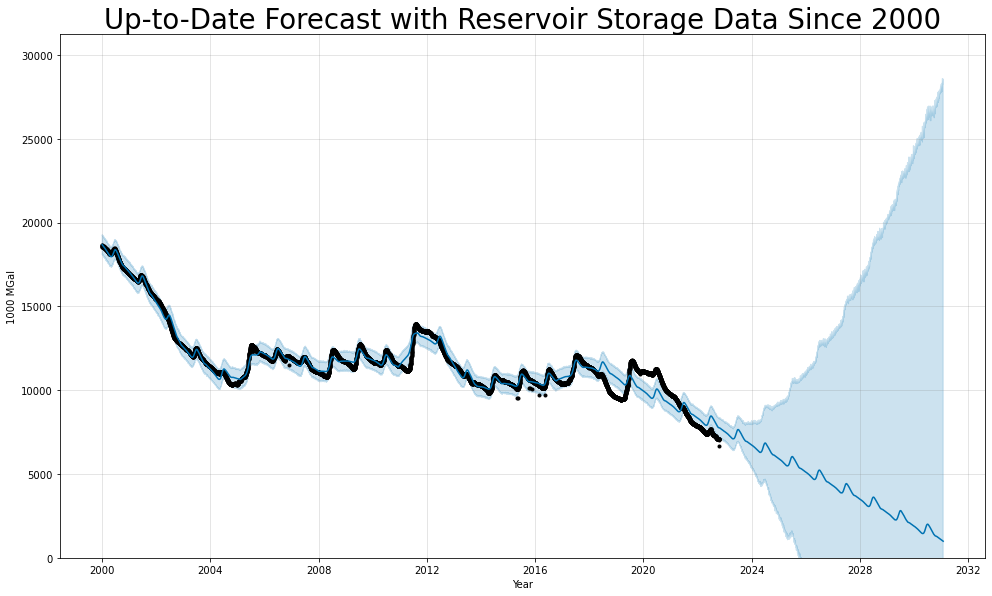

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline
fig = n.plot(realtime_forecast, xlabel='Year', ylabel= '1000 MGal', figsize=[14, 8])
plt.rcParams.update({'font.size': 23})
plt.title('Up-to-Date Forecast with Reservoir Storage Data Since 2000')
plt.ylim(0)
plt.savefig('./images/Up-to-Date_Reservoir_Forecast_2000_raw.png')

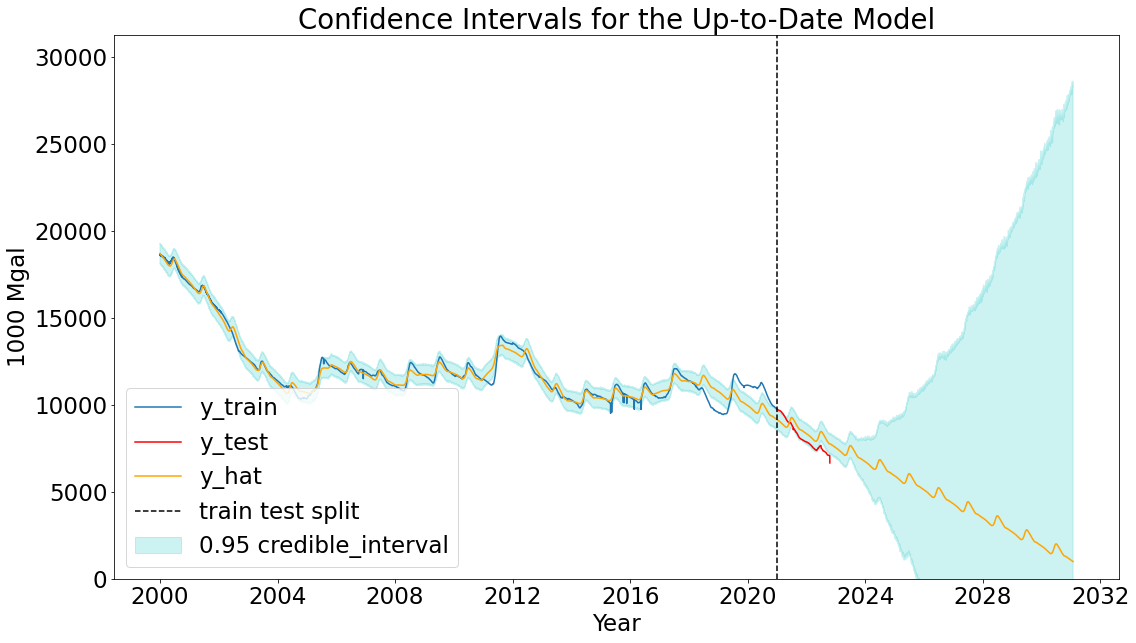

In [77]:
# This plots the performance of the 2020 model.  The data 
# from 2021 (in red) is inside of the predicted range. 
import seaborn as sns

mask2b = realtime_forecast['ds'] < threshold_date

forecast_train2b = realtime_forecast[mask2b]
forecast_test2b = realtime_forecast[~ mask2b]

fig, ax = plt.subplots(figsize=[18, 10])

ax.fill_between(
    x=realtime_forecast['ds'],
    y1=realtime_forecast['yhat_lower'],
    y2=realtime_forecast['yhat_upper'],
    color="c", 
    alpha=0.20,
    label=r'0.95 credible_interval'
)

sns.lineplot(x='ds', y='y', label='y_train', data=df_train2, ax=ax)
sns.lineplot(x='ds', y='y', label='y_test', data=df_test2,\
ax=ax,  color = 'red')
sns.lineplot(x='ds', y='yhat', label='y_hat', data=realtime_forecast, ax=ax,\
color = "orange")
ax.axvline(threshold_date, color= "black", linestyle='--',\
label='train test split')
ax.legend(loc='lower left')
ax.set(title='Confidence Intervals for the Up-to-Date Model',\
ylabel='1000 Mgal', xlabel = "Year")
plt.ylim(0);
plt.savefig('./images/Up-to-Date-Reservoir_Forecast_2000_train_test_split.png')

In [69]:
Col_storage_uptodate_2000['y'].tail()

31185    7081.762118
31186    7078.819780
31187    7077.195775
31188    7051.498573
31189    6655.954043
Name: y, dtype: float64

In [76]:
# This calculates the r-squared and the mean absolute error of 
# train and the test portions of the model.  
from sklearn.metrics import r2_score, mean_absolute_error


future_uptodate = n.make_future_dataframe(periods=0) 
forecast_uptodate = n.predict(df=future_uptodate)
mask3 = forecast_uptodate['ds'] < threshold_date
forecast_test_uptodate = forecast_uptodate[~ mask3]

print('R2 of Up-to-Date test: {}'.format(r2_score(y_true=df_test2['y'],\
y_pred=forecast_test_uptodate['yhat'])))
print('---'*10)
print('Mean Absolute Error: {}'.format(mean_absolute_error\
(y_true=df_test2['y'], y_pred=forecast_test_uptodate['yhat'])))

R2 of Up-to-Date test: 0.4886788169978553
------------------------------
Mean Absolute Error: 550.183405399651
